# Packages, Objects and Function Arguments
---

There is a fundamental difference between packages and objects.
Packages are simply collections of many things: functions, variables and
classes.

Objects are also similar, but they are "alive": You can create multiple objects,
keep different values of variables within them, and each is a distinct entity.

The way to pass arguments to Python functions is also special and powerful. We
will see how to make best use of this feature as well.

##Package

Assume you want a piece of code to perform some calculations related to
a rectangle: Find its area and perimeter for example. If this code
were written in a package, this is how you would typically use it:

```python
import square

area1 = square.Area(length=10, breadth=20)
perimeter1 = square.Perimeter(length=10, breadth=20)

area2 = square.Area(length=15, breadth=25)
perimeter2 = square.Perimeter(length=15, breadth=25)

```

##Object

In an object-oriented approach, you would things slightly differently:

```python

import square

sq1 = square.Square(length=10, breadth=20, centre=(5,5))
sq2 = square.Square(length=15, breadth=25, centre=(10,10))

area1 = sq1.Area()
perimeter1 = sq1.Perimeter()

area2 = sq2.Area()
perimeter2 = sq2.Perimeter()

```

Here, `sq1` and `sq2` _are themselves_ squares, in a sense.

It may seem like more work, but for other things, like

```python
sq1.IsBiggerThan(sq2)

sq1.Intersects(sq2)

sq1.OverlapArea(sq2)
```

are much easier to do when dealing with objects, otherwise we
have to pass the same arguments over and over to the functions.

#Arguments
---

Argument passing in Python is very flexible, and this makes it very suitable for code that is
rapidly changing. Consider a function that calculates the average of a 2-d array:

In [1]:
import scipy as sp
import numpy as np

def calculateAverage(arr):
    
    rows,cols = arr.shape
    print 'Dimensions of the array:', rows, cols
    
    return np.sum(arr)/(rows*cols)

newArray = sp.randn(30,30)

print calculateAverage(newArray)

Dimensions of the array: 30 30
-0.014688888583


Now suppose you are using this function in many of your scripts.

Eventually, you find a situation where you have to exclude the first and last N rows
from your calculation, where N is passed as an argument.

In [3]:
import scipy as sp
import numpy as np

def calculateAverage(arr, excludeRows=0):
    
    rows,cols = arr.shape
    
    arr = arr[excludeRows:rows-excludeRows,:]
    
    rows,cols = arr.shape
    print 'Dimensions of the array:', rows, cols
    
    return np.sum(arr)/(rows*cols)

newArray = sp.randn(30,30)

print calculateAverage(newArray)

print calculateAverage(newArray, excludeRows=4)

Dimensions of the array: 30 30
-0.0252714549543
Dimensions of the array: 22 30
-0.0322515221154


Now you have a situation where you _might_ have to ignore negative
values, or ignore positive values:

In [4]:
import scipy as sp
import numpy as np

def calculateAverage(arr, excludeRows=0, ignoreNegative=False, ignorePositive=False):
    
    rows,cols = arr.shape
    
    arr = arr[excludeRows:rows-excludeRows,:]
    
    rows,cols = arr.shape
    print 'Dimensions of the array:', rows, cols
    
    if ignoreNegative: arr[arr<0] = 0
        
    if ignorePositive: arr[arr>0] = 0
    
    return np.sum(arr)/(rows*cols)

newArray = sp.randn(30,30)

print calculateAverage(newArray)

print calculateAverage(newArray, excludeRows=4)

print calculateAverage(newArray, ignoreNegative=True)

print calculateAverage(newArray, ignorePositive=True)

print calculateAverage(newArray, ignorePositive=True, ignoreNegative=True, excludeRows=3)

Dimensions of the array: 30 30
0.00144796892547
Dimensions of the array: 22 30
0.0122646019917
Dimensions of the array: 30 30
0.398269499301
Dimensions of the array: 30 30
0.0
Dimensions of the array: 24 30
0.0


There is an error in the above code: even though there are negative values in the
array, it always returns zero when asked to ignore positive.

This is because **newArray is being modified by calcAverage()!**

The correct version should be:

In [5]:
import scipy as sp
import numpy as np

def calculateAverage(arr, excludeRows=0, ignoreNegative=False, ignorePositive=False):
    
    #Create a copy for local use
    arr = arr.copy()
    
    rows,cols = arr.shape
    
    arr = arr[excludeRows:rows-excludeRows,:]
    
    rows,cols = arr.shape
    print 'Dimensions of the array:', rows, cols
    
    if ignoreNegative: arr[arr<0] = 0
        
    if ignorePositive: arr[arr>0] = 0
    
    return np.sum(arr)/(rows*cols)

newArray = sp.randn(30,30)

print calculateAverage(newArray)

print calculateAverage(newArray, excludeRows=4)

print calculateAverage(newArray, ignoreNegative=True)

print calculateAverage(newArray, ignorePositive=True)

print calculateAverage(newArray, ignorePositive=True, ignoreNegative=True, excludeRows=3)

Dimensions of the array: 30 30
-0.00505613747098
Dimensions of the array: 22 30
-0.0139921410949
Dimensions of the array: 30 30
0.387494975073
Dimensions of the array: 30 30
-0.392551112544
Dimensions of the array: 24 30
0.0


As you can see, the number of arguments is quickly becoming too long!
To ensure things look much cleaner, we can use the following way
of sending in arguments (which is very popular in Python code)

In [10]:
newArray = sp.randn(30,30)

arguments = (newArray, 4, False, True)

print calculateAverage(*arguments)

Dimensions of the array: 22 30
-0.388377847973


Or to make things much more readable:

In [32]:
newArray = sp.randn(30,30)

arguments = {}

arguments['excludeRows'] = 0
arguments['ignorePositive'] = True
arguments['ignoreNegative'] = False

print calculateAverage(newArray, **arguments)

Dimensions of the array: 30 30
-0.381938303704


As you can see, for the first approach, you can send
all the arguments, but you cannot make out which is which.

For the second approach, you can make out what each argument
corresponds to, but you can only pass those arguments which have
a keyword attached to them.

You can use the both approaches while defining functions as well:

In [12]:
def printAll(printThisAlways, *args):
    
    print printThisAlways
    for arg in args: print arg
        
printAll('Iam printed always','a', 'b', 1, 100.0, 'test', 6, 1e5)

Iam printed always
a
b
1
100.0
test
6
100000.0


In [57]:
def printAllWithColors(**args):
    
    for key in args.keys():
        print key, 'is of color', args[key]
        
myColorCode = {}
myColorCode['ball'] = 'blue'
myColorCode['sky'] = 'orange'
myColorCode['earth'] = 'brown'
myColorCode['3'] = 'not a color'

printAllWithColors(**myColorCode)

earth is of color brown
3 is of color not a color
ball is of color blue
sky is of color orange


In [17]:
print myColorCode.keys()

['earth', 'ball', 'sky']


In [29]:
myarr = sp.randn(5,5)

In [30]:
print myarr

[[-0.73724748 -0.8069127   0.4676705  -1.49691089  0.22150284]
 [ 2.49478168 -1.16784192 -0.83796425 -0.06211458 -2.10011034]
 [-0.61249397  0.30661755 -1.31896651 -1.15374879 -0.46969679]
 [ 1.0933636  -0.25036374 -1.28096542 -1.23442578  0.13727344]
 [-1.10406845 -0.97140892 -0.25708093 -0.18718815  0.65997973]]


In [31]:
print myarr[0:2, 1]

[-0.8069127  -1.16784192]


In [32]:
print myarr[0:4:1,1]

[-0.8069127  -1.16784192  0.30661755 -0.25036374]


In [33]:
np.mean(myarr)

-0.42673281079424141

In [36]:
np.mean(myarr, axis=1)

array([-0.47037955, -0.33464988, -0.6496577 , -0.30702358, -0.37195334])

Populating the interactive namespace from numpy and matplotlib


ValueError: Colormap PuBr is not recognized. Possible values are: Spectral, summer, coolwarm, Wistia_r, pink_r, Set1, Set2, Set3, brg_r, Dark2, prism, PuOr_r, afmhot_r, terrain_r, PuBuGn_r, RdPu, gist_ncar_r, gist_yarg_r, Dark2_r, YlGnBu, RdYlBu, hot_r, gist_rainbow_r, gist_stern, PuBu_r, cool_r, cool, gray, copper_r, Greens_r, GnBu, gist_ncar, spring_r, gist_rainbow, gist_heat_r, Wistia, OrRd_r, CMRmap, bone, gist_stern_r, RdYlGn, Pastel2_r, spring, terrain, YlOrRd_r, Set2_r, winter_r, PuBu, RdGy_r, spectral, rainbow, flag_r, jet_r, RdPu_r, gist_yarg, BuGn, Paired_r, hsv_r, bwr, cubehelix, Greens, PRGn, gist_heat, spectral_r, Paired, hsv, Oranges_r, prism_r, Pastel2, Pastel1_r, Pastel1, gray_r, jet, Spectral_r, gnuplot2_r, gist_earth, YlGnBu_r, copper, gist_earth_r, Set3_r, OrRd, gnuplot_r, ocean_r, brg, gnuplot2, PuRd_r, bone_r, BuPu, Oranges, RdYlGn_r, PiYG, CMRmap_r, YlGn, binary_r, gist_gray_r, Accent, BuPu_r, gist_gray, flag, bwr_r, RdBu_r, BrBG, Reds, Set1_r, summer_r, GnBu_r, BrBG_r, Reds_r, RdGy, PuRd, Accent_r, Blues, autumn_r, autumn, cubehelix_r, nipy_spectral_r, ocean, PRGn_r, Greys_r, pink, binary, winter, gnuplot, RdYlBu_r, hot, YlOrBr, coolwarm_r, rainbow_r, Purples_r, PiYG_r, YlGn_r, Blues_r, YlOrBr_r, seismic, Purples, seismic_r, RdBu, Greys, BuGn_r, YlOrRd, PuOr, PuBuGn, nipy_spectral, afmhot

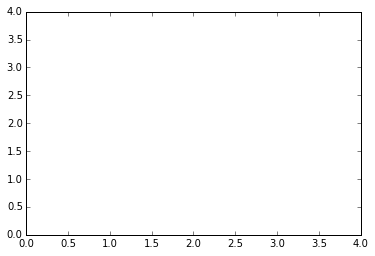

In [50]:
%pylab inline

contourf(myarr, levels=linspace(0,1,10), cmap='PuBr')
colorbar()

<matplotlib.contour.QuadContourSet instance at 0x7f1f5875c170>

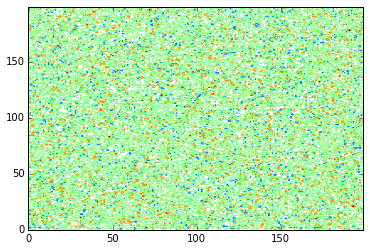

In [53]:
myarr[myarr<0] = 0
myarr= sp.randn(200,200)
contour(myarr)